In [1]:
%run ./../../utils/commonImports.py
%matplotlib inline

# Read Data

In [2]:
# dropbox_dir = 'D:\\Dropbox\\My work\\krypl-project'
dropbox_dir = '/Users/david.vesely/Dropbox/My work/krypl-project'

def read_data(pair):
    db = os.path.join(dropbox_dir, 'sqlite', 'ploniex-chart-data', f'{pair}.db')
    data = load_trading_data(db, 'chart_data', from_date='2015-01-01', period='30min')
    data['ohlc4'] = (data['open'] + data['close'] + data['high'] + data['low']) / 4
    return data

In [13]:
all_pairs = pd.read_csv('pairs.tsv', header=None)[0].tolist()

In [14]:
data_dict = {pair: read_data(pair) for pair in all_pairs}

# Pairs History

In [42]:
history_stats = pd.DataFrame()
for pair in all_pairs:
    data = data_dict[pair]
    pair_stats = pd.DataFrame({
        'min_date': [data['date'].min()],
        'max_date': [data['date'].max()],
        'count': [data.shape[0]],
        'pair': [pair],
        'volume': [data['volume'].sum()]
    })
    pair_stats['pair'] = pair
    history_stats = history_stats.append(pair_stats)

cols = ['pair', 'volume', 'min_date', 'max_date', 'count']
history_stats = reset_index_hard(history_stats)[cols]

In [48]:
history_selected = history_stats.query(f"min_date < '2016-01-01'")\
    .sort_values('volume', ascending=False)

# Pairs Volume

In [49]:
volume_stats = pd.DataFrame()
for pair in history_selected['pair']:
    data = data_dict[pair]
    pair_stats = data[['volume']].describe().transpose()
    pair_stats['sum'] = data['volume'].sum()
    pair_stats['pair'] = pair
    volume_stats = volume_stats.append(pair_stats)

cols = list(volume_stats.columns)
cols = cols[-1:] + cols[:-1]
volume_stats = reset_index_hard(volume_stats).sort_values('mean', ascending=False)[cols]

In [50]:
volume_stats

,pair,count,mean,std,min,25%,50%,75%,max,sum
0,BTC_ETH,"64,243.0000",229.6503,549.2046,0.0000,10.1302,51.7467,203.7596,"17,839.2286","14,753,425.0319"
1,BTC_XRP,"74,796.0000",67.6514,307.4623,0.0000,0.4912,4.1238,22.8594,"10,355.5510","5,060,052.6649"
2,BTC_LTC,"74,765.0000",41.4830,190.0196,0.0000,0.3062,2.1226,13.2914,"10,390.3772","3,101,479.8049"
3,BTC_XMR,"74,796.0000",37.7601,171.0147,0.0000,1.2844,5.1108,20.4888,"8,192.4823","2,824,304.7348"
4,BTC_STR,"74,796.0000",21.8508,147.0960,0.0000,0.0651,1.1001,7.4552,"13,681.3604","1,634,350.4391"
5,BTC_DASH,"74,765.0000",20.8560,91.3148,0.0000,0.2921,2.2121,11.0804,"4,456.2588","1,559,301.2141"
8,BTC_FCT,"61,469.0000",14.1082,46.3264,0.0000,0.1937,2.1367,10.5916,"2,359.2740","867,217.3404"
6,BTC_DGB,"72,852.0000",13.0300,96.0327,0.0000,0.0193,0.4710,2.8153,"8,105.3195","949,264.9381"
7,BTC_BTS,"74,765.0000",11.9120,92.5290,0.0000,0.0907,0.8925,5.5919,"8,772.1098","890,601.9814"
10,BTC_SC,"63,388.0000",10.8974,54.7395,0.0000,0.0947,0.7504,4.0511,"3,732.5735","690,761.4287"


# Look at begining of data if the volume is enough

/anaconda3/envs/crypto36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/crypto36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/envs/crypto36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

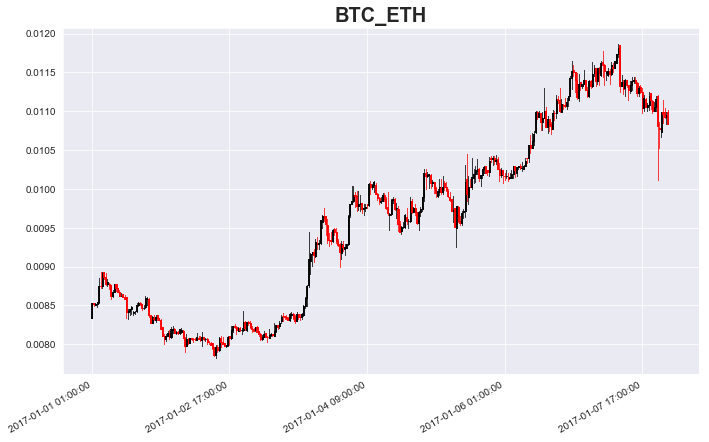

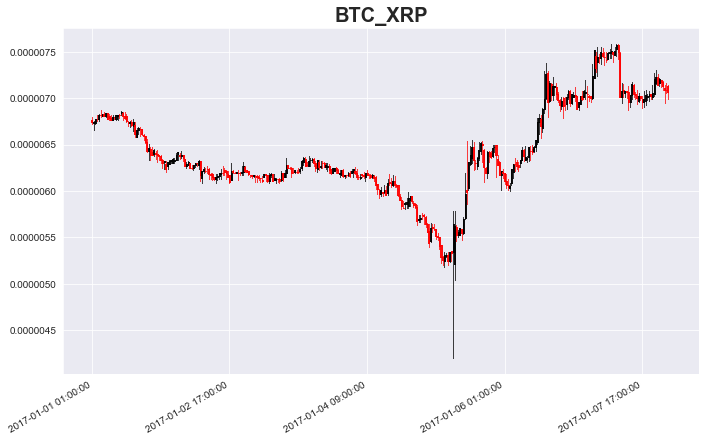

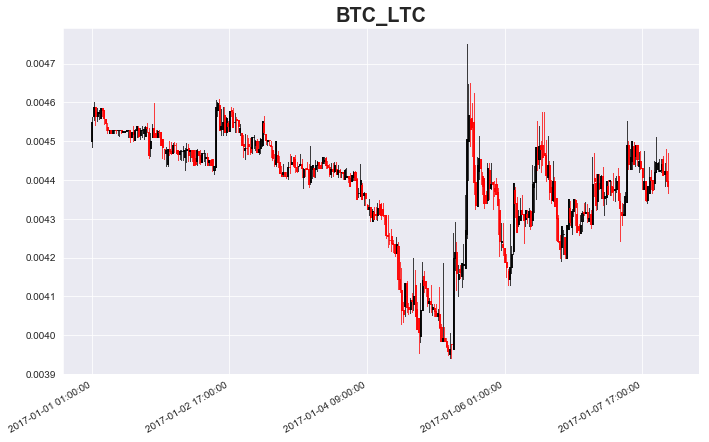

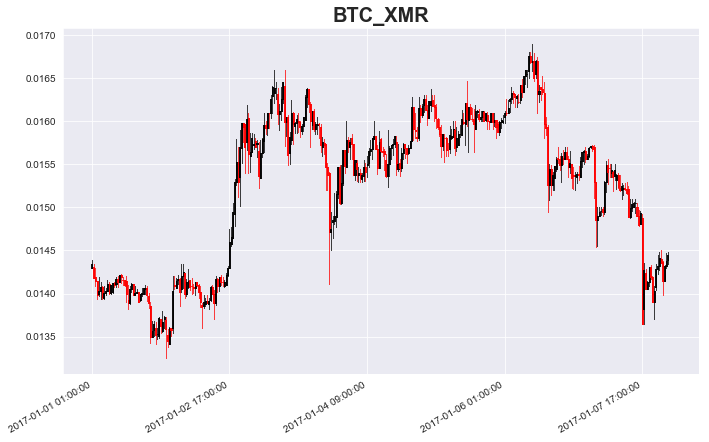

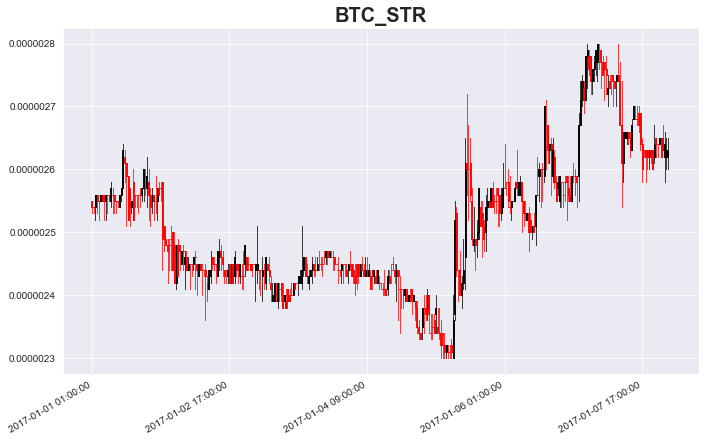

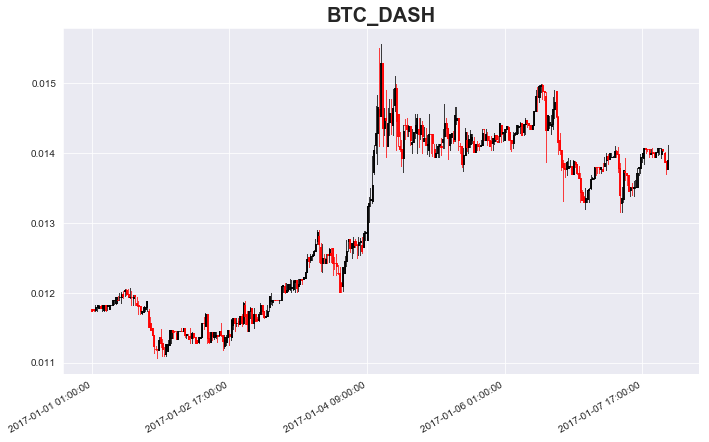

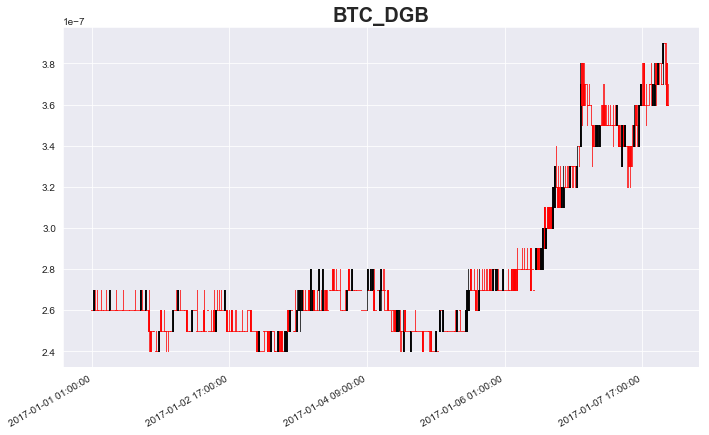

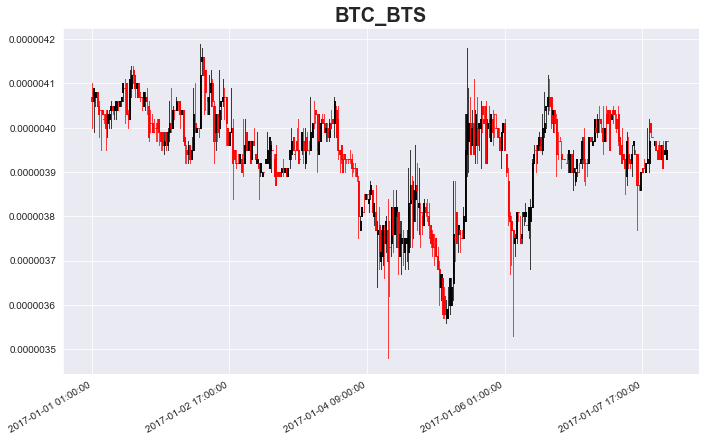

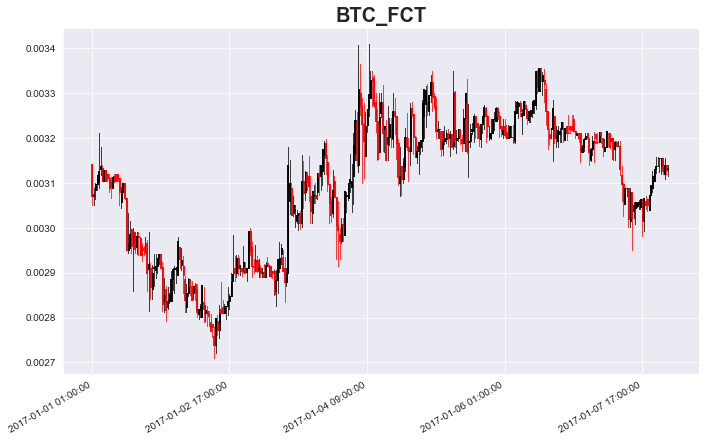

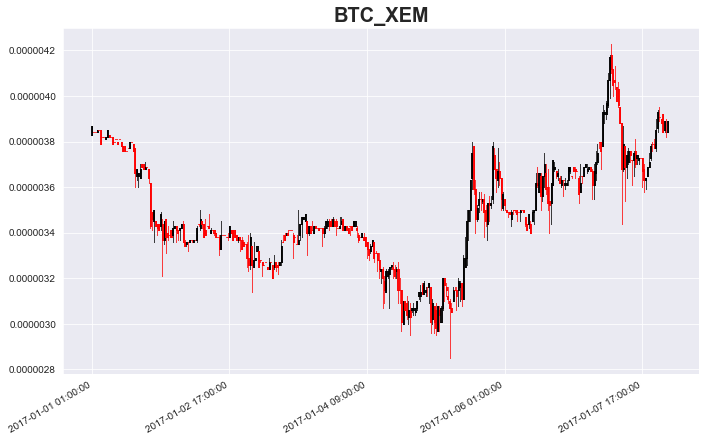

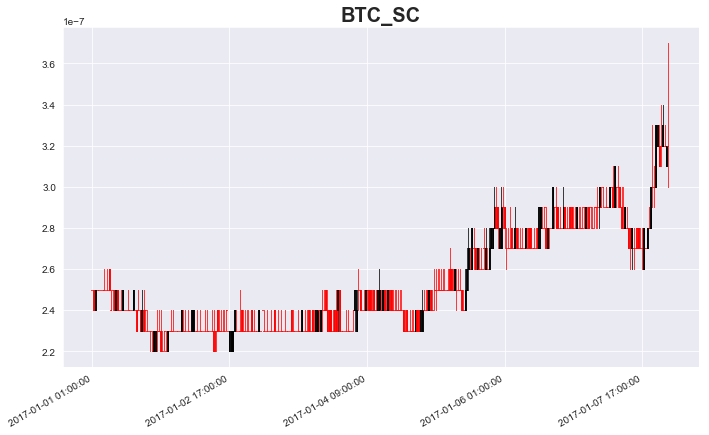

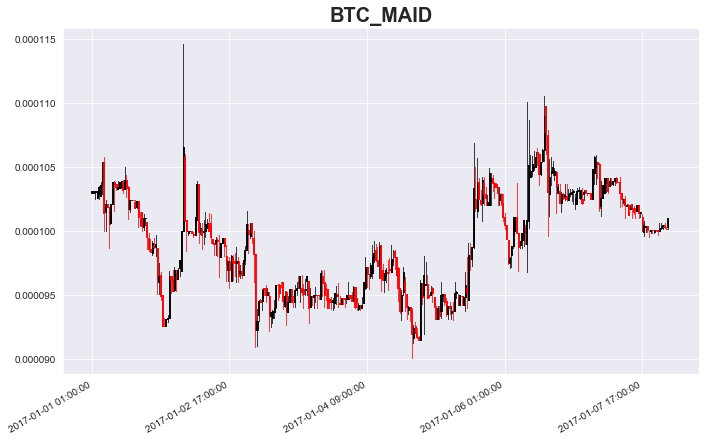

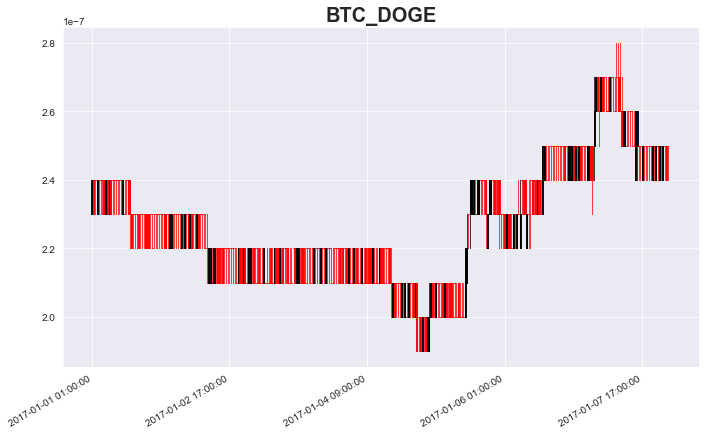

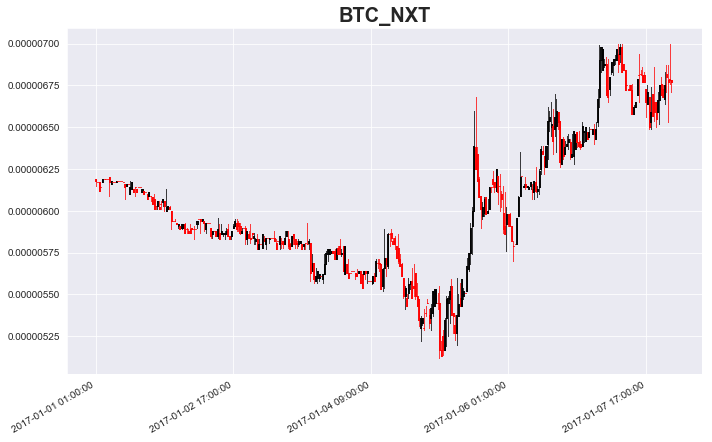

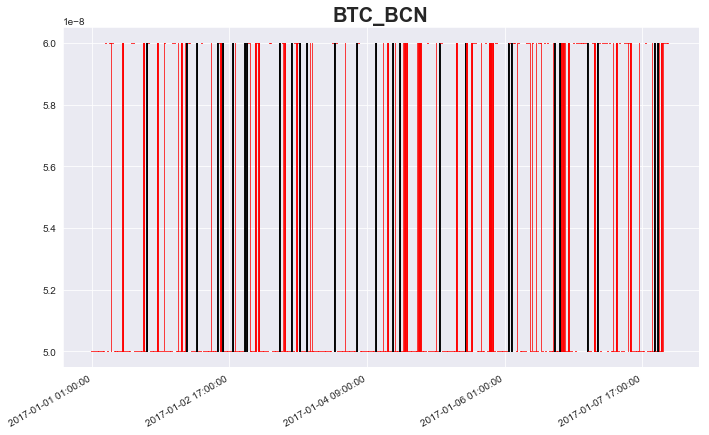

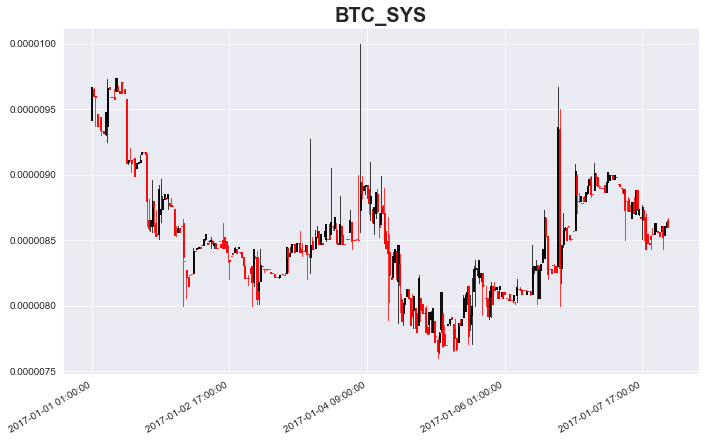

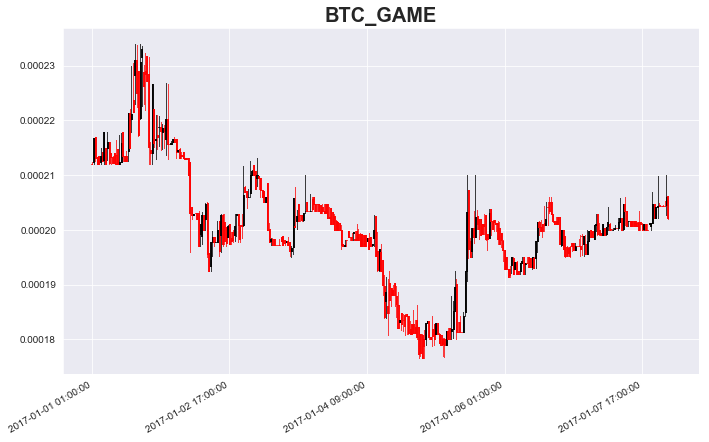

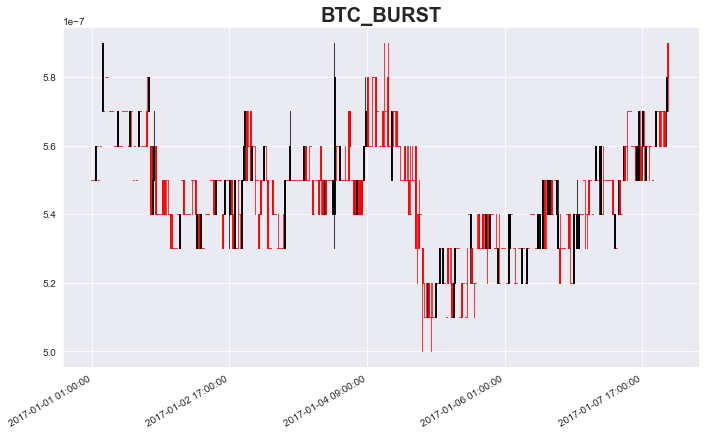

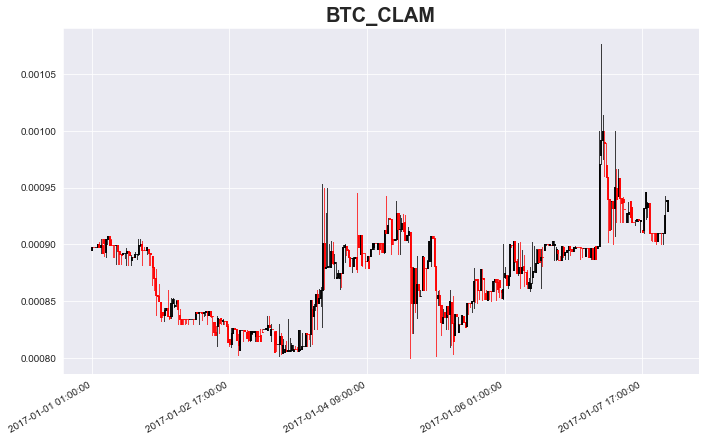

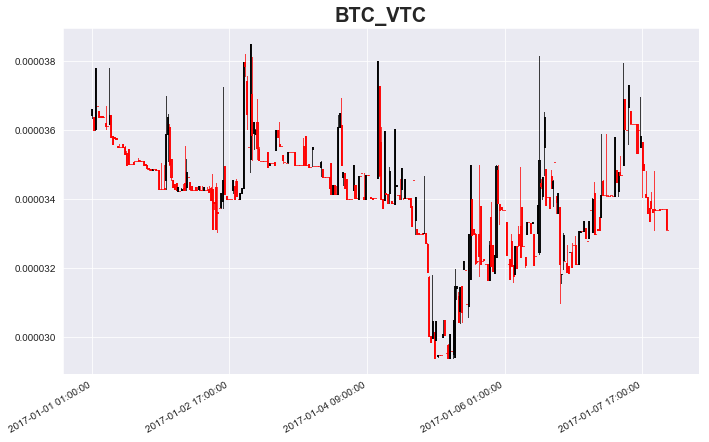

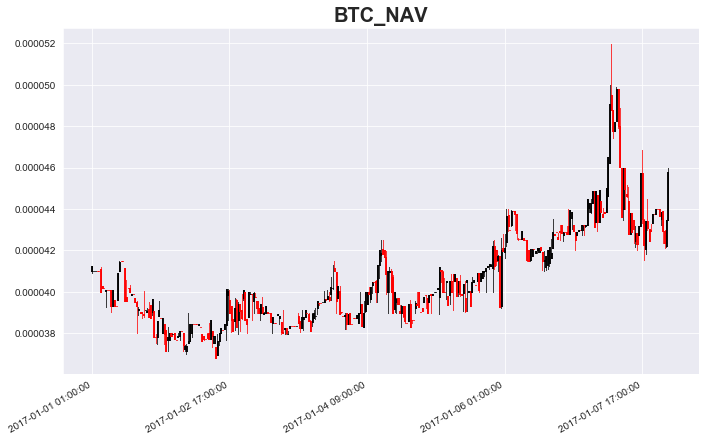

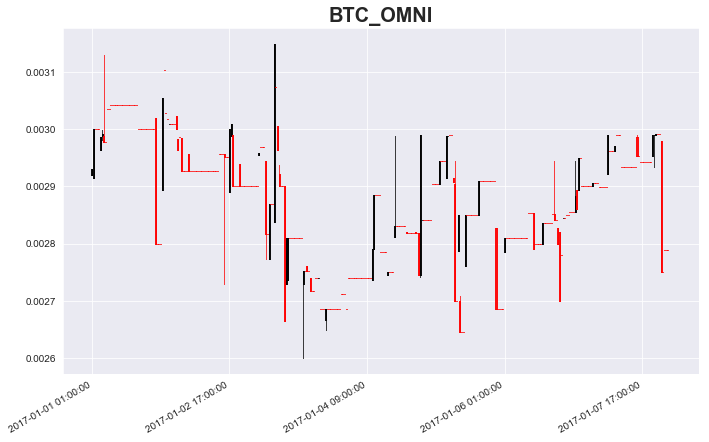

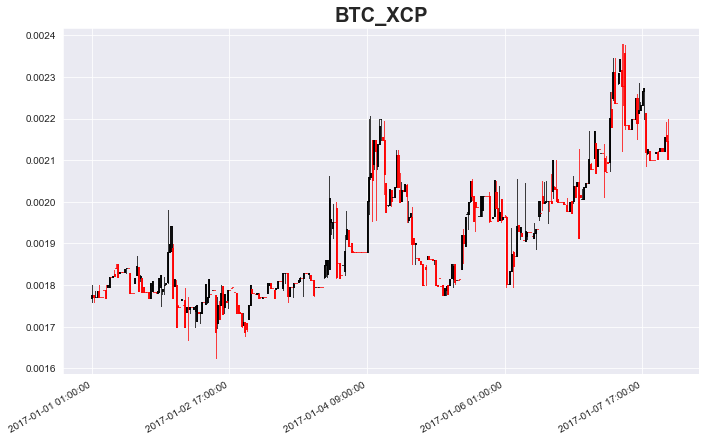

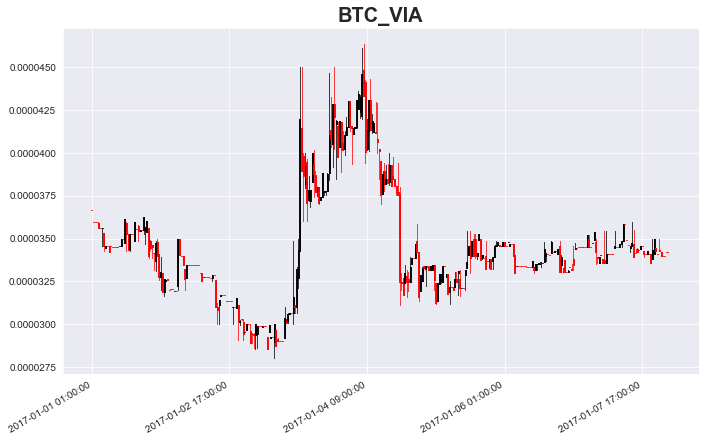

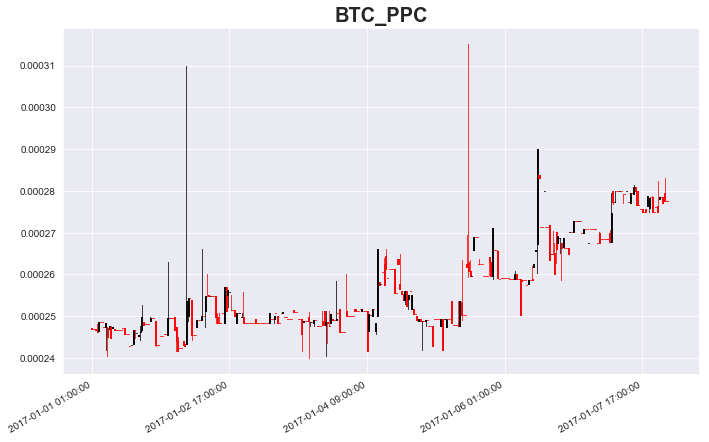

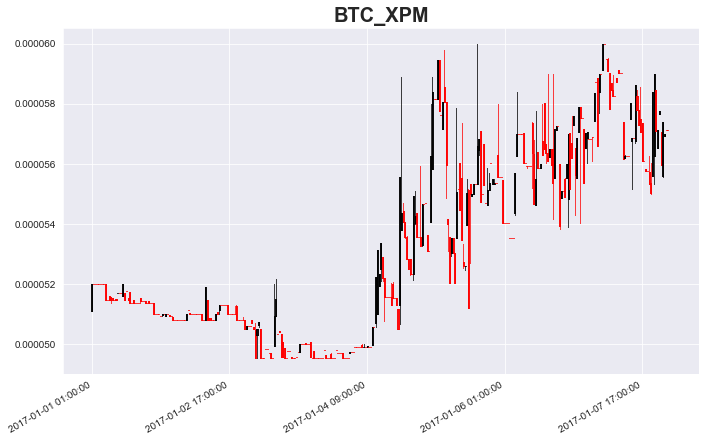

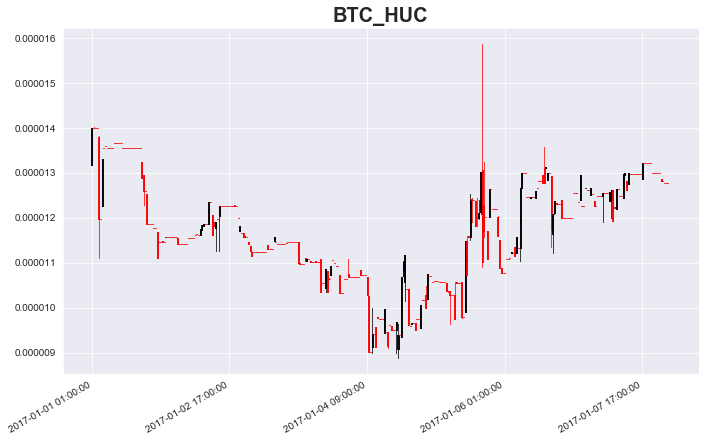

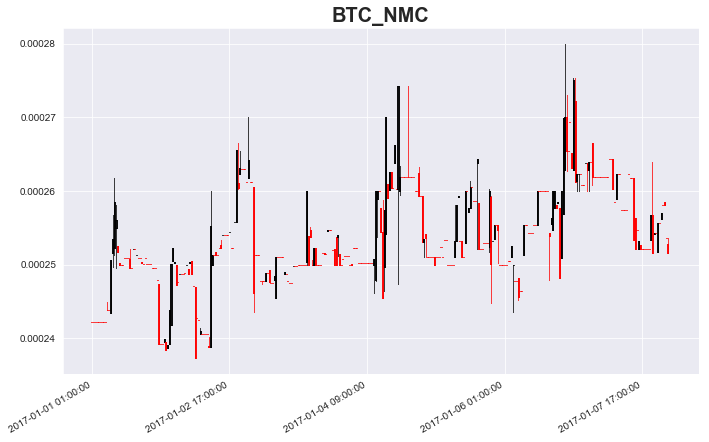

In [55]:
for pair in history_selected['pair']:
    data = data_dict[pair]
    selected = reset_index_hard(data.query('date >= "2017-01-01" and date < "2017-01-08"').sort_values('timestamp'))
    plot_candles(selected)
    plt.title(pair, fontproperties=title_font)

In [56]:
exclude_pairs = ['BTC_DGB', 'BTC_SC', 'BTC_DOGE', 'BTC_BCN', 
                 'BTC_BURST', 'BTC_OMNI', 'BTC_PPC', 'BTC_HUC', 'BTC_NMC']

# Save selected pairs

In [60]:
history_selected[~history_selected['pair'].isin(exclude_pairs)]['pair'].to_csv('selected-pairs.tsv', index=False, header=False)

# Split note

* Trenovani je vzdy na 2016-01-01 <= date < 2018-01-01
* Testovani je vzdy na 2018-01-01 <= date < 2019-01-04
* Osetreno v exputils read_train a read_test